# Transmissie lijnen

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf
import schemdraw
import schemdraw.elements as elm

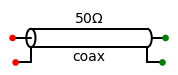

In [8]:
d = schemdraw.Drawing()

d.add(elm.Dot,color='r')
coax=d.add(elm.coax(d='right',length=5, label='$50\Omega$', botlabel='coax'))
d.add(elm.Dot,color='g')
d.add(elm.Line(xy=coax.shieldend,l=0.5,d='down'))
d.add(elm.Line(l=0.5,d='right'))
d.add(elm.Dot,color='g')
d.add(elm.Line(xy=coax.shieldstart,l=0.5,d='down') )
d.add(elm.Line(l=0.5,d='left'))
d.add(elm.Dot,color='r')
d.draw()

```{figure} ./images/mpl.svg
---
name: t_model
---
schematische voorstelling van een transmissielijn met karakteristieke impedantie van 50 Ohm
```

## Transmissie lijn model

$$ Z_o=\sqrt{\frac{j \omega L+R}{j \omega C+g}}$$

waarbij L de inductantie per eenheid lengte is, C de capaciteit er eenheid lengte is, R de weerstand van de geleider en g de lekgeleidbaarheid van het dielectricum.

In het beste geval is de weerstand van de geleider nul (R=0) en de lek ook nul (g=0). $Z_o$ wordt dan 

$$ Z_o \approx \sqrt{\frac{L}{C}}$$

## Coax kabel

{numref}`coaxdoorsnede` toont de doorsnede van een coax kabel met daarop de belangrijkste parameters voor het bepalen van de C per eenheid lengte en de L per eenheid lengte.

[![coax](./images/coax.png)](https://www.eeweb.com/tools/coax/)

```{figure} ./images/mpl.svg
---
name: coaxdoorsnede
---
Schematische cross-section van een coax kabel met de aanduiding van de belangrijkste parameters
```

Voor een typische [coax-kabel](https://en.wikipedia.org/wiki/Coaxial_cable) met binnendiameter x mm en buiten diameter  y bekomen we de volgende parameters:


In [14]:
def coax_parameters(D1,D2,f,e_r,sigma_c,sigma=1,mu=1,mu_c=1,display=True):
    e_0 = 8.85e-12 # F/m
    mu_0 = 4*np.pi*1e-7 # H/m
    Rs = np.sqrt(np.pi*f*mu_0*mu_c/sigma_c)
    R_p = Rs/np.pi*(1/D1 +1/D2) # Ohms/m
    L_p = mu_0*mu/(2*np.pi)*np.log(D2/D1) #H/m
    G_p = 2*np.pi*sigma/np.log(D2/D1) # S/m
    C_p = 2*np.pi*e_0*e_r/np.log(D2/D1)
    if display:
        print("R = %2.5f ohms/m" % (R_p,))
        print("L = %2.2f nH/m" % (L_p*1e9,))
        print("G = %2.3f S/m" % (G_p,))
        print("C = %2.2f pF/m" % (C_p*1e12,))
    return R_p, L_p, G_p, C_p

coax_parameters(12e-3,24e-3,1e6,1.0,5.8e7);

R = 0.01038 ohms/m
L = 138.63 nH/m
G = 9.065 S/m
C = 80.22 pF/m



Het verloop van de karakteristieke impedantie ziet er voor deze coax kabel uit als aangegeven in {numref}`t_Z-f`

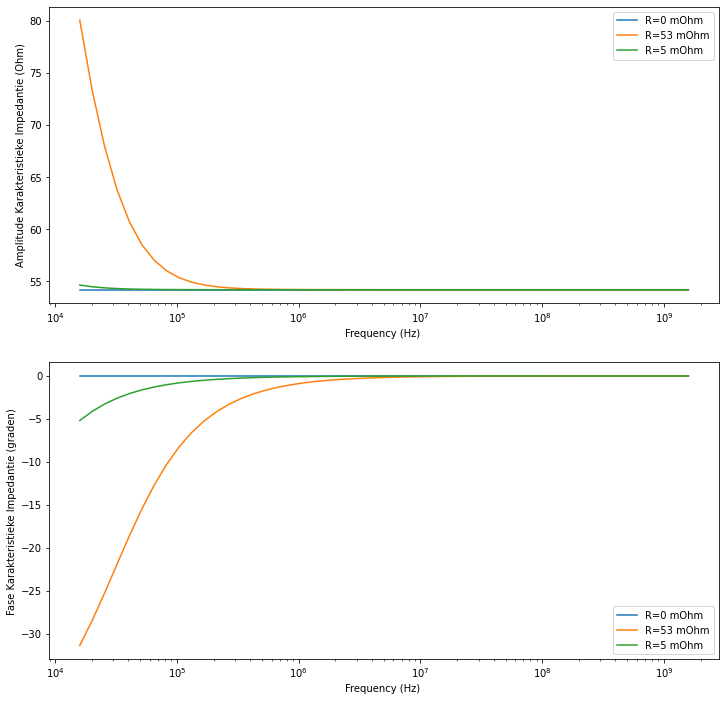

In [37]:
fig,ax = plt.subplots(2,1,figsize=(12,12))
w=np.logspace(5,10,50)
z=np.sqrt((1.0j*w*273e-9+0.0)/(1.0j*w*93e-12))
z2=np.sqrt((1.0j*w*273e-9+0.053)/(1.0j*w*93e-12))
z3=np.sqrt((1.0j*w*273e-9+0.005)/(1.0j*w*93e-12))
ax[0].plot(w/2/np.pi,abs(z), label="R=0 mOhm")
ax[0].plot(w/2/np.pi,abs(z2), label="R=53 mOhm")
ax[0].plot(w/2/np.pi,abs(z3), label="R=5 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z,deg=True), label="R=0 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z2,deg=True), label="R=53 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z3,deg=True), label="R=5 mOhm")
ax[0].set_xscale('log')
ax[0].set_ylabel('Amplitude Karakteristieke Impedantie (Ohm)',size = 10)
ax[0].set_xlabel('Frequency (Hz) ',size = 10)
ax[1].set_xscale('log')
ax[1].set_ylabel('Fase Karakteristieke Impedantie (graden)',size = 10)
ax[1].set_xlabel('Frequency (Hz) ',size = 10);
ax[0].legend()
ax[1].legend();

```{figure} ./images/mpl.svg
---
name: t_Z-f
---
Verloop van de karakteristieke impedantie van een RG-58 coax als functie van de frequentie.
```

Uit {numref}`t_Z-f` merken we dat bij lage frequenties deze karakteristieke impedantie in belangrijke mate verschilt van 50 Ohm. De negatieve fase geeft aan dat bij lage frequenties de lijn zich capacitief gedraagt.

## Twisted pair kabel

{numref}`twisted_pairdoorsnede` toont de doorsnede van een twisted pair kabel met daarop de belangrijkste parameters voor het bepalen van de C per eenheid lengte en de L per eenheid lengte.

[![coax](./images/twisted_pair.png)](https://www.eeweb.com/tools/twisted_pair/)

```{figure} ./images/mpl.svg
---
name: twisted_pairdoorsnede
---
Schematische cross-section van een twisted pair kabel met de aanduiding van de belangrijkste parameters
```

## striplijn



## Microstrip Analysis and Design Equations
Here we code take the text analysis and design equations for zero strip thickness microstrip. These equation assume the line is lossless, that is $\sigma = 0$ (dielectric is lossless) so $G' = 0$ and the metal conductor is perfect, i.e. $R_s \approx 0$ so $R' \approx 0$. 

Three functions are involved (see Text pages 62--64):

1. `Z0, e_eff = mstrip_anal(w/h,er)` which finds the line characteristic impedance $Z_0$ given a particular width to height ratio $s = w/h$ and also returns $\epsilon_r$ (substrate relative permittivity).
2. `s, e_eff = mstrip_dsgn(Z0, er)` which finds the width to height ratio $s = w/h$ given the desired characteristic impedance $Z_0$ and also returns $\epsilon_r$ (substrate relative permittivity).
3. `e_eff = eps_eff(w/h,er)` which finds the effective permittivity of the microstrip given the ratio $s = w/h$ (width to substrate height ratio) and $\epsilon_r$ (substrate relative permittivity). This is a helper function called by the first two functions.

Additionally we may want to obtain $R'$, $L'$, $G'$, and $C'$. Since it assumed that $R' = 0$ and $G' = 0$, that leaves only $L'$ and $C'$ and we may also want to have $\alpha$ and $\beta$. These parameters can be found from
\begin{align*}
    C' &= \frac{1}{Z_0 v_p}=\frac{\sqrt{\epsilon_\text{eff}}}{Z_0 c} \\
    L' &= Z_0^2C' \\
    \alpha &= 0\ (\text{since $R' = G' = $}) \\
    \beta &= \frac{2\pi}{\lambda} = 2\pi\frac{f}{v_p}=2\pi\, \frac{f}{c/\sqrt{\epsilon_\text{eff}}} = \frac{\omega}{c}\sqrt{\epsilon_\text{eff}}
\end{align*}
where $v_p$ is the velocity of propagation in the medium, which here is $c/\sqrt{\epsilon_\text{eff}}$.

In [21]:
def mstrip_anal(s,er):
    """
    Microstrip zero thickness strips design function
    
    s = w/h
    er = material relative permittivity
    
    Z0 returned
    e_eff returned
    
    Mark Wickert February 2016
    """
    e_eff = eps_eff(s,er)
    t = (30.67/s)**0.75
    Z0 = 60/np.sqrt(e_eff) * \
         np.log((6+(2*np.pi-6)*np.exp(-t))/s + np.sqrt(1+4/s**2))
    return Z0, e_eff

def mstrip_dsgn(Z0,er):
    """
    Mircostrip zero thickness strips design function
    
    Z0 = desired characteristic impedance
    er = material relative permittivity
    
    s = w/h is returned
    e_eff returned
    
    Mark Wickert February 2016
    """
    if Z0 <= (44-2*er):
        q = 60*np.pi*np.pi/(Z0*np.sqrt(er))
        s = 2/pi*((q-1)-np.log(2*q-1) + \
                 (er-1)/(2*er)*(np.log(q-1)+0.29-0.52/er))
        
    else:
        p = np.sqrt((er+1)/2)*Z0/60+(er-1)/(er+1)*(0.23 + 0.12/er)
        s = 8*np.exp(p)/(np.exp(2*p)-2)
    e_eff = eps_eff(s,er)
    return s, e_eff

def eps_eff(s,er):
    """
    Find microstrip e_eff given s = w/h and er
    
    Mark Wickert February 2016
    """
    x = 0.56*((er-0.9)/(er+3))**0.05
    y = 1 + 0.02*np.log((s**4 + 3.7e-4*s**2)/(s**4+0.43)) + \
        0.05*np.log(1+1.7e-4*s**3)
    e_eff = (er+1)/2 + (er-1)/2*(1+10/s)**(-x*y)
    return e_eff

def mstrip_extra(Z0,er,f = 1e9,h = 1):
    """
    Extra parameters: L', C', beta, \lambda_g
    
    Z0 = characteristic impedance in Ohms
    er = relative permittivity
    f = operatng frequency in Hz
    h = substrate height in m
    
    Mark Wickert February 2016
    """
    c = 3e8 # m/s
    s, e_eff = mstrip_dsgn(Z0,er)
    C_p = np.sqrt(e_eff)/(Z0*c) # F/m
    L_p = Z0**2*C_p  #H/m
    R_p = 0
    G_p = 0
    alpha = 0
    beta = 2*pi/c*np.sqrt(e_eff) # rad/m
    lambda_g = c/np.sqrt(e_eff)/f # m
    # Print formatted results
    print('Line width w = %1.3e mm, Rel. perm: e_eff = %2.3f' % (s*h*1000,e_eff))
    print('Line width w = %1.3e mils (common PCB unit)' % (s*h*1000/0.0254,))
    print('-----------------------------------------------------')
    print("Resistance per unit length: R' = 0 ohms/m")
    print("Inductance per unit length: L' = %1.3e nH/m" % (L_p*1e9,))
    print("Conductance per unit length: G' = 0 S/n")
    print("Capacitance per unit length: C' = %1.3e pF/m" % (C_p*1e12,))
    print('-----------------------------------------------------')
    print('Phase constant: beta = %1.3e rad/m' % beta)
    print('Wavelength in free space: lambda = %1.3e cm' % (c/f*1e2,))
    print('Wavelength in medium (guide): lambda_g = %1.3e cm' % (lambda_g*1e2,))

In [57]:
1/16*1000

62.5

In [58]:
mstrip_extra(50,4.6,f= 2.4e9,h=1/16*2.54*1/100) #in*cm/in*m/cm

Line width w = 2.931e+00 mm, Rel. perm: e_eff = 3.460
Line width w = 1.154e+02 mils (common PCB unit)
-----------------------------------------------------
Resistance per unit length: R' = 0 ohms/m
Inductance per unit length: L' = 3.100e+02 nH/m
Conductance per unit length: G' = 0 S/n
Capacitance per unit length: C' = 1.240e+02 pF/m
-----------------------------------------------------
Phase constant: beta = 3.896e-08 rad/m
Wavelength in free space: lambda = 1.250e+01 cm
Wavelength in medium (guide): lambda_g = 6.720e+00 cm


In [59]:
print('Quarterwave line length at 2.4 GHz  = %1.3f cm' % (6.72/4,))
print('or %1.3f in.' % (6.72/4*1/2.54,))

Quarterwave line length at 2.4 GHz  = 1.680 cm
or 0.661 in.


## Microstrip Analysis Plots
Here we consider three material types: Micro-fiber PTFE, FR4, and Ceramic-filled PTFE over a range of $w/h$ values.

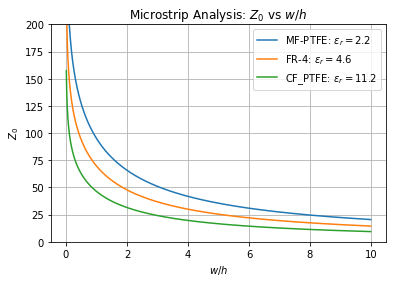

In [24]:
s = np.arange(0.01,10,.01)
Z0 = np.zeros_like(s)
e_eff = np.zeros_like(s)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,sk in enumerate(s):
        Z0[k],e_eff[k] = mstrip_anal(sk,er[m])
    plt.plot(s,Z0)
plt.ylim([0,200])
plt.xlabel(r'$w/h$')
plt.ylabel(r'$Z_0$')
plt.title(r'Microstrip Analysis: $Z_0$ vs $w/h$')
plt.legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
plt.grid();

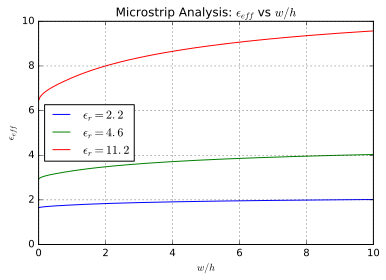

In [61]:
s = arange(0.01,10,.01)
Z0 = zeros_like(s)
e_eff = zeros_like(s)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,sk in enumerate(s):
        Z0[k],e_eff[k] = mstrip_anal(sk,er[m])
    plot(s,e_eff)
ylim([0,10])
xlabel(r'$w/h$')
ylabel(r'$\epsilon_{eff}$')
title(r'Microstrip Analysis: $\epsilon_{eff}$ vs $w/h$')
legend((r'$\epsilon_r = 2.2$',r'$\epsilon_r=4.6$',
        r'$\epsilon_r=11.2$'),loc='best')
grid();

## Microstrip Design Plots
Here we consider three material types: Micro-fiber PTFE, FR4, and Ceramic-filled PTFE over a range of $w/h$ values.

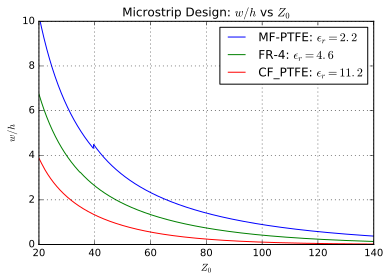

In [62]:
Z0 = arange(20,140,.1)
s = zeros_like(Z0)
e_eff = zeros_like(Z0)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,Z0k in enumerate(Z0):
        s[k],e_eff[k] = mstrip_dsgn(Z0k,er[m])
    plot(Z0,s)
ylim([0,10])
xlabel(r'$Z_0$')
ylabel(r'$w/h$')
title(r'Microstrip Design: $w/h$ vs $Z_0$')
legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
grid();

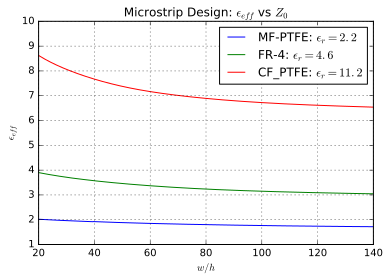

In [63]:
for m in range(3):
    for k,Z0k in enumerate(Z0):
        s[k],e_eff[k] = mstrip_dsgn(Z0k,er[m])
    plot(Z0,e_eff)
ylim([1,10])
xlabel(r'$w/h$')
ylabel(r'$\epsilon_{eff}$')
title(r'Microstrip Design: $\epsilon_{eff}$ vs $Z_0$')
legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
grid();